In [3]:
#dependences
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv("C:/Users/naveen/Downloads/exams.csv")

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [7]:
data.shape

(1000, 8)

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#visualization

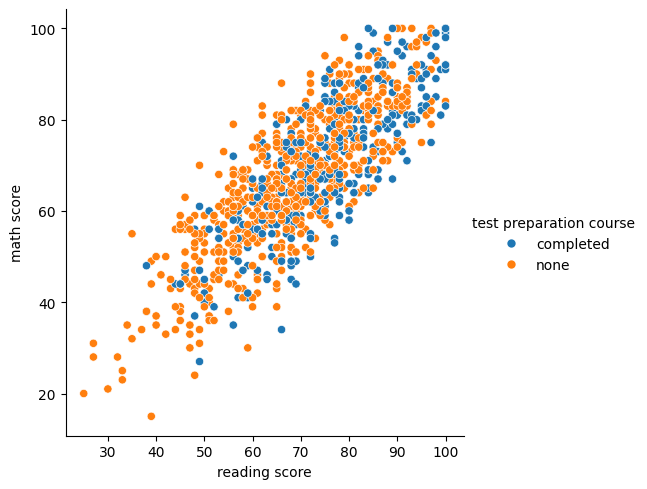

In [11]:
sns.relplot(x='reading score',y='math score',hue='test preparation course',data=data)

In [12]:
#modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
train = data.drop("writing score", axis=1)
test = data["writing score"]

In [14]:
train = pd.get_dummies(train, drop_first=True)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=2)

In [16]:
train = data.drop("writing score", axis=1)
test = data["writing score"]

In [17]:
regr = LinearRegression()

In [18]:
regr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
pred=regr.predict(X_test)

In [20]:
pred

array([ 67.54878978,  42.49696561,  91.55027761,  49.44919596,
        54.1640277 ,  49.27494989,  88.34093996,  68.61043855,
        70.87960066,  82.79102583,  77.49346137,  68.53801701,
        91.57945392,  60.8263112 ,  76.17388961,  68.76162138,
        75.81646645,  66.28686839,  75.55179507,  83.4436802 ,
        87.49825001,  90.12036499,  80.72978229,  90.71383142,
        60.26684104,  70.13062145,  22.90594039,  59.24635143,
        63.55085647,  48.47046012,  67.56017521,  64.76880451,
        88.93447677,  49.48970094,  68.68381484,  73.99323325,
        60.29711511,  49.06716284,  42.26756779,  59.7716732 ,
        57.71136874,  60.25046102,  55.99882965,  42.95075525,
        69.13549208,  48.09732245,  78.97052379,  50.77053372,
        57.91858008,  71.20137147,  45.03141639,  87.55244096,
        48.36722425,  82.69012797,  78.7584605 ,  87.44452938,
        74.54050042,  91.24345058,  54.0390744 ,  42.79828949,
        80.87740915,  90.16324259,  49.16108749,  74.67

In [21]:
regr.score(X_test,y_test)

0.9365863718884746

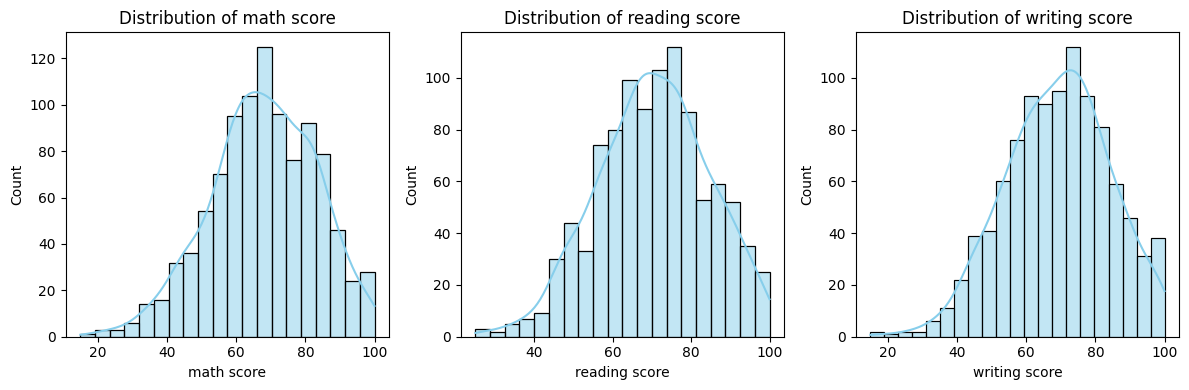

In [23]:
plt.figure(figsize=(12,4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


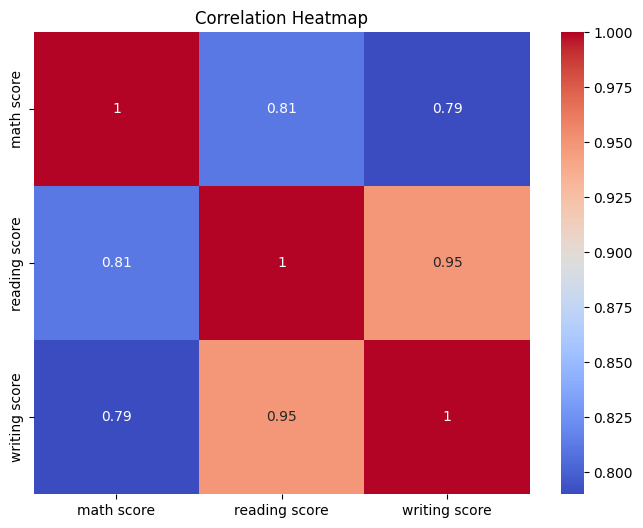

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_8600\366009166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing score', data=data, palette='pastel')


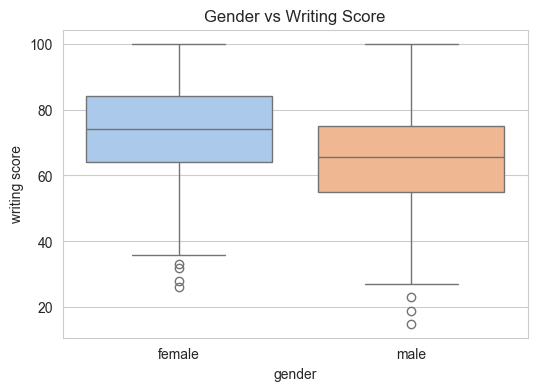

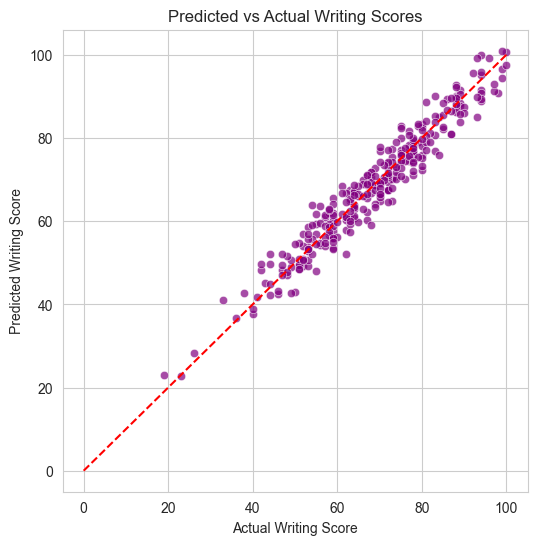

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='writing score', data=data, palette='pastel')
plt.title('Gender vs Writing Score')
plt.show()
# Scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred, alpha=0.7, color='purple')
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Predicted vs Actual Writing Scores")
plt.plot([0,100],[0,100],'r--')  # reference line
plt.show()

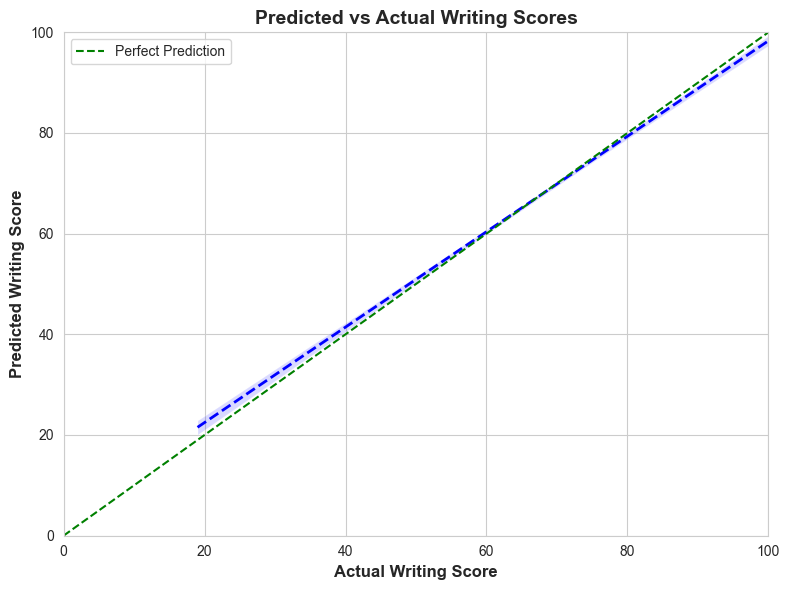

In [45]:


# Beautiful Scatter Plot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
#sns.scatterplot(x=y_test, y=pred, s=100, alpha=0.6, color="r", edgecolor="black")

#Regression line
sns.regplot(x=y_test, y=pred, scatter=False, color="blue", line_kws={"linewidth":2, "linestyle":"--"})

# Reference line (perfect prediction)
plt.plot([0, 100], [0, 100], 'g--', linewidth=1.5, label='Perfect Prediction')

# Labels and Title
plt.xlabel("Actual Writing Score", fontsize=12, weight='bold')
plt.ylabel("Predicted Writing Score", fontsize=12, weight='bold')
plt.title("Predicted vs Actual Writing Scores", fontsize=14, weight='bold')

# Legend
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
